# Topic Modeling in Practice
After completing an NLP course with Perian Data, I took on the challenge of applying Latent Dirichlet Allocation (LDA) to this Quora Dataset. You can find the dataset used in this project on my github (leorossi07)

## LDA


In [1]:
import pandas as pd

df = pd.read_csv('quora_questions.csv')

df.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [19]:
df.shape

(404289, 3)

> **Preprocessing and Creating Document Term Matrix**

In [2]:
df.isnull().sum()

Question    0
dtype: int64

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [5]:
# Document Term Matrix - dtm

In [6]:
dtm = cv.fit_transform(df['Question'])

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

**Applying LDA**

> We will divide the questions in 10 labels (k = 10). I don't know if it's the best option, but if you are trying to be more accurate, you should use a "coherence score"

In [8]:
LDA = LatentDirichletAllocation(n_components = 10, random_state = 42)

In [9]:
LDA.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [10]:
len(LDA.components_)

10

In [11]:
len(LDA.components_[0])

38669

In [12]:
LDA.components_.shape

(10, 38669)

The top 15 words for topic 0: 


C:\Users\rossi\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['history', 'card', 'game', 'use', 'com', 'android', 'good', 'career', 'google', 'difference', 'software', 'engineering', 'examples', 'best', 'does']


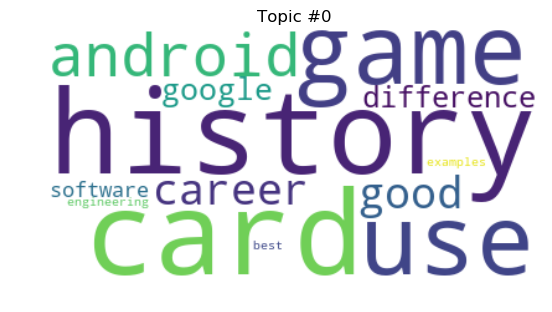




The top 15 words for topic 1: 
['favorite', 'rupee', 'interview', 'word', 'money', 'rs', 'india', 'think', 'english', 'black', 'stop', 'indian', '1000', 'notes', '500']


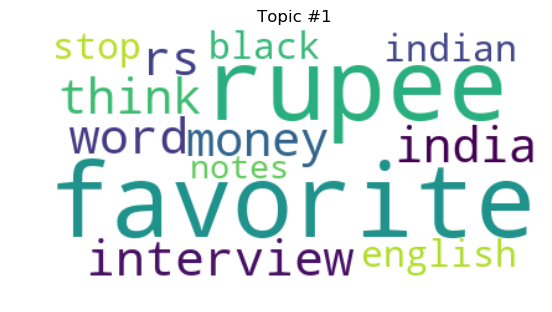




The top 15 words for topic 2: 
['exist', 'real', 'india', 'purpose', 'cost', 'universe', 'compare', 'water', 'did', 'average', 'energy', 'good', 'time', 'does', 'life']


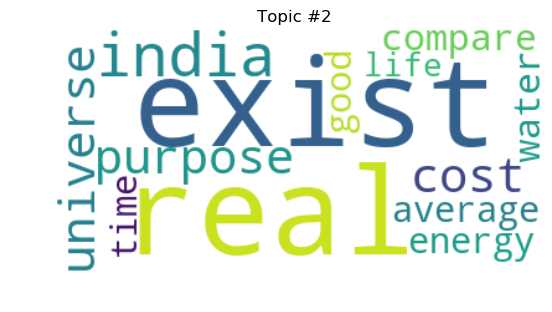




The top 15 words for topic 3: 
['going', 'answer', 'thing', 'don', 'does', 'ask', 'day', 'question', 'movie', 'things', 'questions', 'know', 'new', 'people', 'quora']


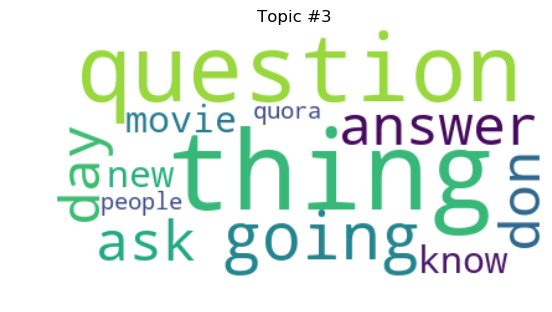




The top 15 words for topic 4: 
['salary', 'state', 'mba', 'jobs', 'power', 'women', 'country', 'differences', 'rid', 'password', 'college', 'difference', 'car', 'india', 'job']


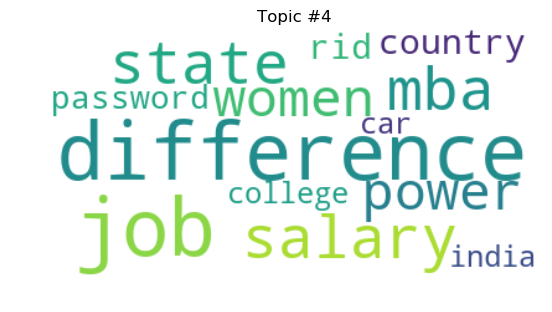




The top 15 words for topic 5: 
['people', 'think', 'math', 'girl', 'india', 'war', 'work', 'sex', 'long', 'did', 'feel', 'mean', 'world', 'like', 'does']


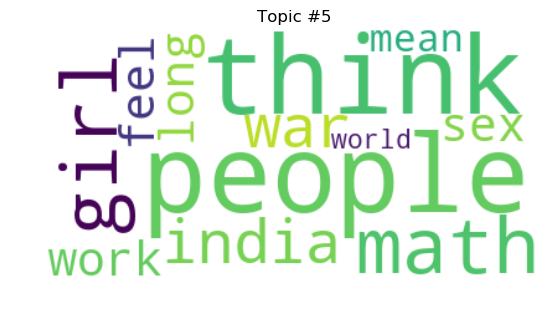




The top 15 words for topic 6: 
['prepare', 'better', 'day', 'computer', 'exam', 'days', 'difference', 'school', 'science', 'study', 'live', 'good', 'lose', 'weight', 'best']


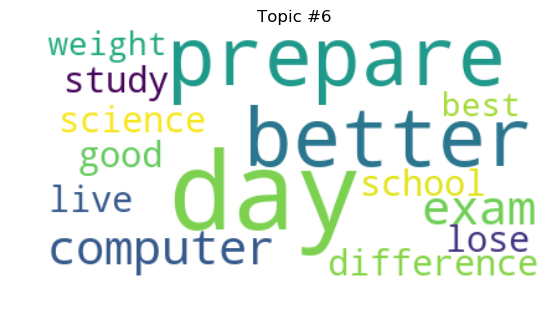




The top 15 words for topic 7: 
['president', 'good', 'programming', 'business', 'improve', 'donald', 'start', 'india', 'make', 'online', 'trump', 'money', 'learn', 'way', 'best']


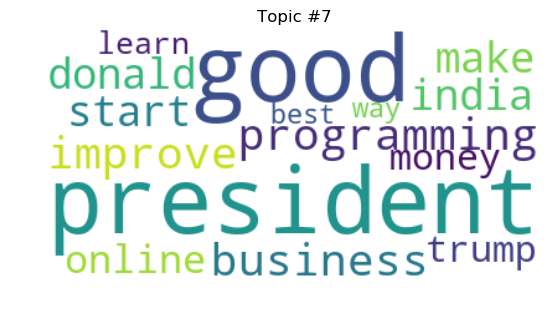




The top 15 words for topic 8: 
['does', 'create', 'using', 'way', 'whatsapp', 'number', 'love', 'website', 'free', 'phone', 'data', 'instagram', 'facebook', 'use', 'account']


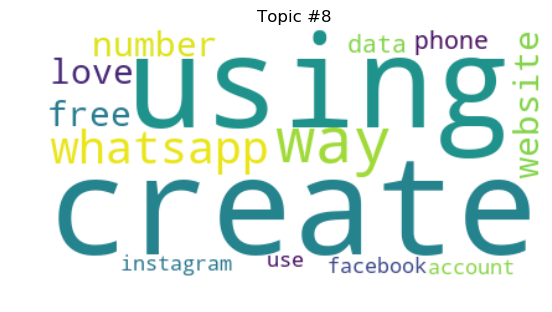




The top 15 words for topic 9: 
['parents', 'safe', 'hotel', 'prepare', 'travel', 'police', 'did', 'test', 'age', 'increase', 'possible', 'time', 'year', 'old', 'years']


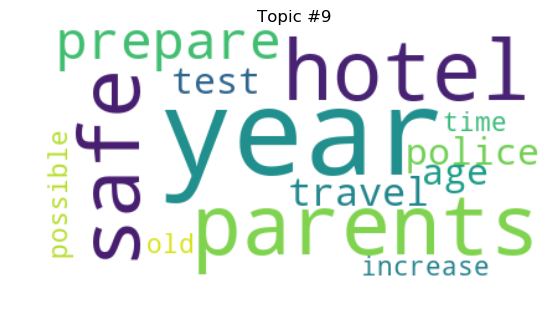

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for index, topic in enumerate(LDA.components_):
    print(f"The top 15 words for topic {index}: ")
    top_words = [cv.get_feature_names()[i] for i in topic.argsort()[-15:]]
    print(top_words)
    
    wordcloud = WordCloud(background_color="white").generate(" ".join(top_words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Topic #{index}')
    plt.show()
    print('\n\n')

> **Ataching Discovered Topics to Questions**

In [14]:
dtm.shape

(404289, 38669)

In [15]:
topic_results = LDA.transform(dtm)

In [16]:
df['Topic_Index'] = topic_results.argmax(axis=1)

>**Labeling Topics**

In [18]:
topic_labels = {
    0: "Technology and Engineering",
    1: "India and Finance",
    2: "Life and Existence",
    3: "Quora and Questions",
    4: "Jobs and Education",
    5: "People and Society",
    6: "Health and Self-Improvement",
    7: "Business and Entrepreneurship",
    8: "Social Media and Communication",
    9: "Safety and Travel"
}

# Create a new column with topic labels
df['Topic_Label'] = df['Topic_Index'].map(topic_labels)

# Display the distribution of topics
print(df['Topic_Label'].value_counts())


People and Society                53414
Business and Entrepreneurship     49315
Jobs and Education                42487
Technology and Engineering        42442
Health and Self-Improvement       42245
Social Media and Communication    38095
Quora and Questions               37268
Life and Existence                35186
Safety and Travel                 34459
India and Finance                 29378
Name: Topic_Label, dtype: int64


In [20]:
df.head(20)

,Question,Topic_Index,Topic_Label
0,What is the step by step guide to invest in sh...,7,Business and Entrepreneurship
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,4,Jobs and Education
2,How can I increase the speed of my internet co...,8,Social Media and Communication
3,Why am I mentally very lonely? How can I solve...,5,People and Society
4,"Which one dissolve in water quikly sugar, salt...",2,Life and Existence
5,Astrology: I am a Capricorn Sun Cap moon and c...,2,Life and Existence
6,Should I buy tiago?,4,Jobs and Education
7,How can I be a good geologist?,2,Life and Existence
8,When do you use シ instead of し?,8,Social Media and Communication
9,Motorola (company): Can I hack my Charter Moto...,8,Social Media and Communication
